In [8]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/ukoilprices.csv')

df

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,19.11.2023,"80,58","80,27","82,93","78,43","114,14K","-0,04%"
1,12.11.2023,"80,61","81,42","83,98","76,61","340,03K","-1,01%"
2,05.11.2023,"81,43","85,55","86,46","79,20","1,62M","-4,08%"
3,29.10.2023,"84,89","90,07","90,15","84,56","1,09M","-6,18%"
4,22.10.2023,"90,48","92,11","92,45","86,68","1,19M","-1,82%"
...,...,...,...,...,...,...,...
1812,26.02.1989,"16,95","16,40","17,05","16,32","18,65K","4,95%"
1813,19.02.1989,"16,15","16,12","16,38","16,02","17,24K","0,87%"
1814,12.02.1989,"16,01","15,25","16,06","15,23","11,98K","1,20%"
1815,05.02.1989,"15,82","16,10","16,22","15,73","9,59K","-2,16%"


Transforming date strings in the 'Tarih' column to a datetime format,
converts numeric values in the 'Şimdi' column to floats, and subsequently sorts the DataFrame by date.



In [9]:

df['Tarih'] = pd.to_datetime(df['Tarih'], format='%d.%m.%Y')
df['Şimdi'] = df['Şimdi'].str.replace(',', '.').astype('float')

df=df.sort_values(by='Tarih')
df=df.reset_index(drop=True)

df

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,1989-01-29,16.17,"16,35","16,35","15,16","17,59K","-0,80%"
1,1989-02-05,15.82,"16,10","16,22","15,73","9,59K","-2,16%"
2,1989-02-12,16.01,"15,25","16,06","15,23","11,98K","1,20%"
3,1989-02-19,16.15,"16,12","16,38","16,02","17,24K","0,87%"
4,1989-02-26,16.95,"16,40","17,05","16,32","18,65K","4,95%"
...,...,...,...,...,...,...,...
1812,2023-10-22,90.48,"92,11","92,45","86,68","1,19M","-1,82%"
1813,2023-10-29,84.89,"90,07","90,15","84,56","1,09M","-6,18%"
1814,2023-11-05,81.43,"85,55","86,46","79,20","1,62M","-4,08%"
1815,2023-11-12,80.61,"81,42","83,98","76,61","340,03K","-1,01%"


Ukoil price change over time

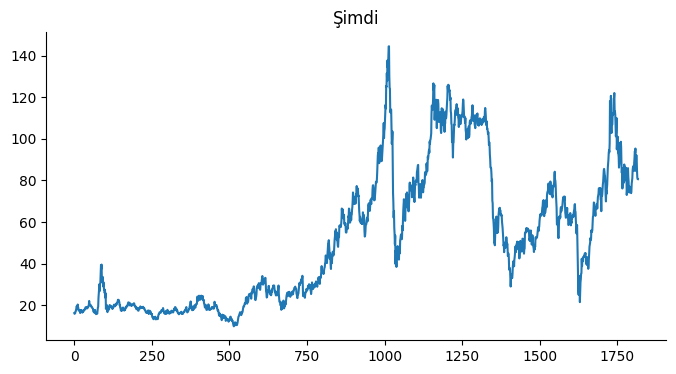

In [10]:
df['Şimdi'].plot(kind='line', figsize=(8, 4), title='Şimdi')
plt.gca().spines[['top', 'right']].set_visible(False)


Distribution of price

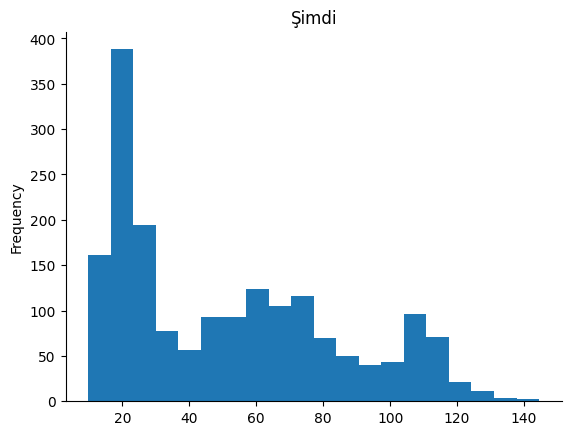

In [11]:
df['Şimdi'].plot(kind='hist', bins=20, title='Şimdi')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
df = df[['Tarih', 'Şimdi']]

df

,Tarih,Şimdi
0,1989-01-29,16.17
1,1989-02-05,15.82
2,1989-02-12,16.01
3,1989-02-19,16.15
4,1989-02-26,16.95
...,...,...
1812,2023-10-22,90.48
1813,2023-10-29,84.89
1814,2023-11-05,81.43
1815,2023-11-12,80.61


Setting the date(Tarih) column as index. It is commonly used for time series analysis

In [13]:
df.index = df.pop('Tarih')
df

,Şimdi
Tarih,
1989-01-29,16.17
1989-02-05,15.82
1989-02-12,16.01
1989-02-19,16.15
1989-02-26,16.95
...,...
2023-10-22,90.48
2023-10-29,84.89
2023-11-05,81.43


Display of the dates selected for analysis. It is essential to determine which data should be used. In this analysis, the date started at 2006-02-26. The price distribution now appears to resemble a Gaussian distribution



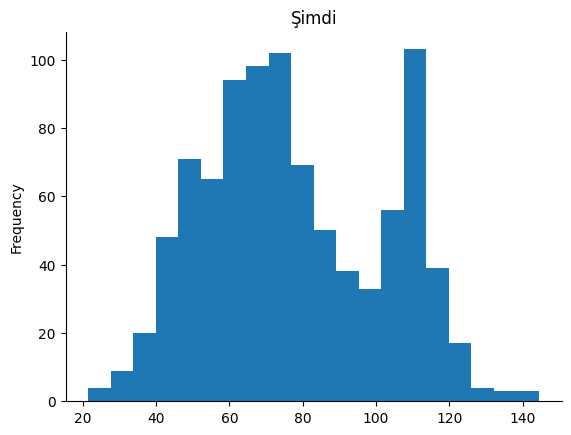

In [14]:
start_date = pd.to_datetime('2006-02-26', format='%Y-%m-%d')
df_after_start_date = df.loc[start_date:, 'Şimdi']

df_after_start_date.plot(kind='hist', bins=20, title='Şimdi')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()


The df_to_windowed_df function generates a structured DataFrame (windowed_df) for time series analysis. It iterates over weekly intervals between '2006-02-26' and '2023-11-19', extracts a window of 'n+1' weeks of price data for each interval, and organizes the information into columns. The resulting DataFrame includes columns for the target date, historical prices for the past 'n' weeks, and the corresponding target price for prediction. Target column is the column that we predict



In [15]:
import numpy as np
import datetime

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = pd.to_datetime(first_date_str, format='%Y.%m.%d')
  last_date  = pd.to_datetime(last_date_str, format='%Y.%m.%d')

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Şimdi'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2015-01-11'
windowed_df = df_to_windowed_df(df,
                                pd.to_datetime('2006-02-26',format='%Y.%m.%d'),
                                pd.to_datetime('2023-11-19',format='%Y.%m.%d'),
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2006-02-26,59.64,59.89,62.60,64.18
1,2006-03-05,59.89,62.60,64.18,60.83
2,2006-03-12,62.60,64.18,60.83,63.26
3,2006-03-19,64.18,60.83,63.26,63.51
4,2006-03-26,60.83,63.26,63.51,65.91
...,...,...,...,...,...
921,2023-10-22,84.58,90.89,92.16,90.48
922,2023-10-29,90.89,92.16,90.48,84.89
923,2023-11-05,92.16,90.48,84.89,81.43
924,2023-11-12,90.48,84.89,81.43,80.61


The function windowed_df_to_date_X_y processes a windowed DataFrame, converting it into three arrays: dates representing the target dates, X containing the historical price data reshaped for model input, and y containing the target prices. The dates array holds the timestamps for each prediction instance, while X is a three-dimensional array representing the input features, and y is a one-dimensional array representing the target prices. The shapes of these arrays are determined by the number of instances, the window size, and the model's expected input format.


In [16]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((926,), (926, 3, 1), (926,))

The code divides the dataset into training, validation, and test sets based on specified quantiles. The first 80% of the data is assigned to the training set (dates_train, X_train, y_train), the next 10% to the validation set (dates_val, X_val, y_val), and the remaining 10% to the test set (dates_test, X_test, y_test).


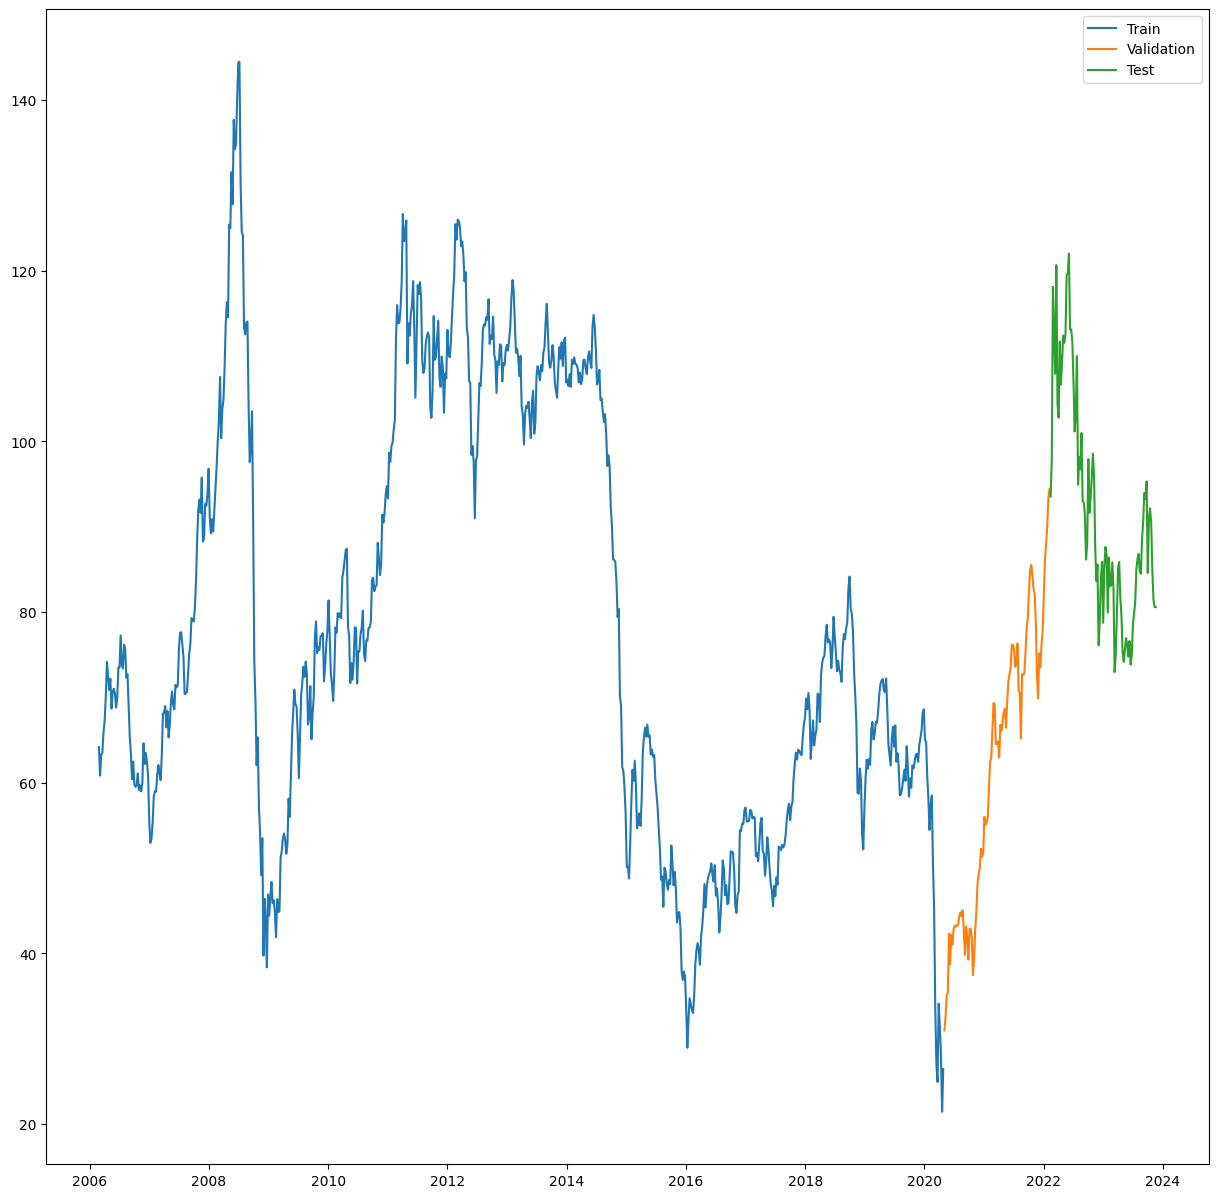

In [17]:
q_80 = int(len(dates) * .80)
q_90 = int(len(dates) * .90)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(15, 15))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

Creating the model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.layers import Dense,Dropout

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    Dropout(0.2),
                    layers.Dense(32, activation='relu'),
                    Dropout(0.2),
                    layers.Dense(32, activation='relu'),
                    Dropout(0.2),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

cıktı=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)



Epoch 1/100
24/24 [==============================] - 10s 27ms/step - loss: 6499.7471 - mean_absolute_error: 76.5549 - val_loss: 3653.8145 - val_mean_absolute_error: 58.0958
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 5727.6094 - mean_absolute_error: 71.1202 - val_loss: 2540.3779 - val_mean_absolute_error: 47.3264
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 3617.9561 - mean_absolute_error: 52.9433 - val_loss: 568.0250 - val_mean_absolute_error: 19.9548
Epoch 4/100
24/24 [==============================] - 0s 7ms/step - loss: 1238.0226 - mean_absolute_error: 28.3627 - val_loss: 599.4766 - val_mean_absolute_error: 19.8490
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 843.0882 - mean_absolute_error: 23.9951 - val_loss: 222.0829 - val_mean_absolute_error: 11.9537
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 539.1385 - mean_absolute_error: 18.3933 - val_loss: 23.4651 - val_mean_abs

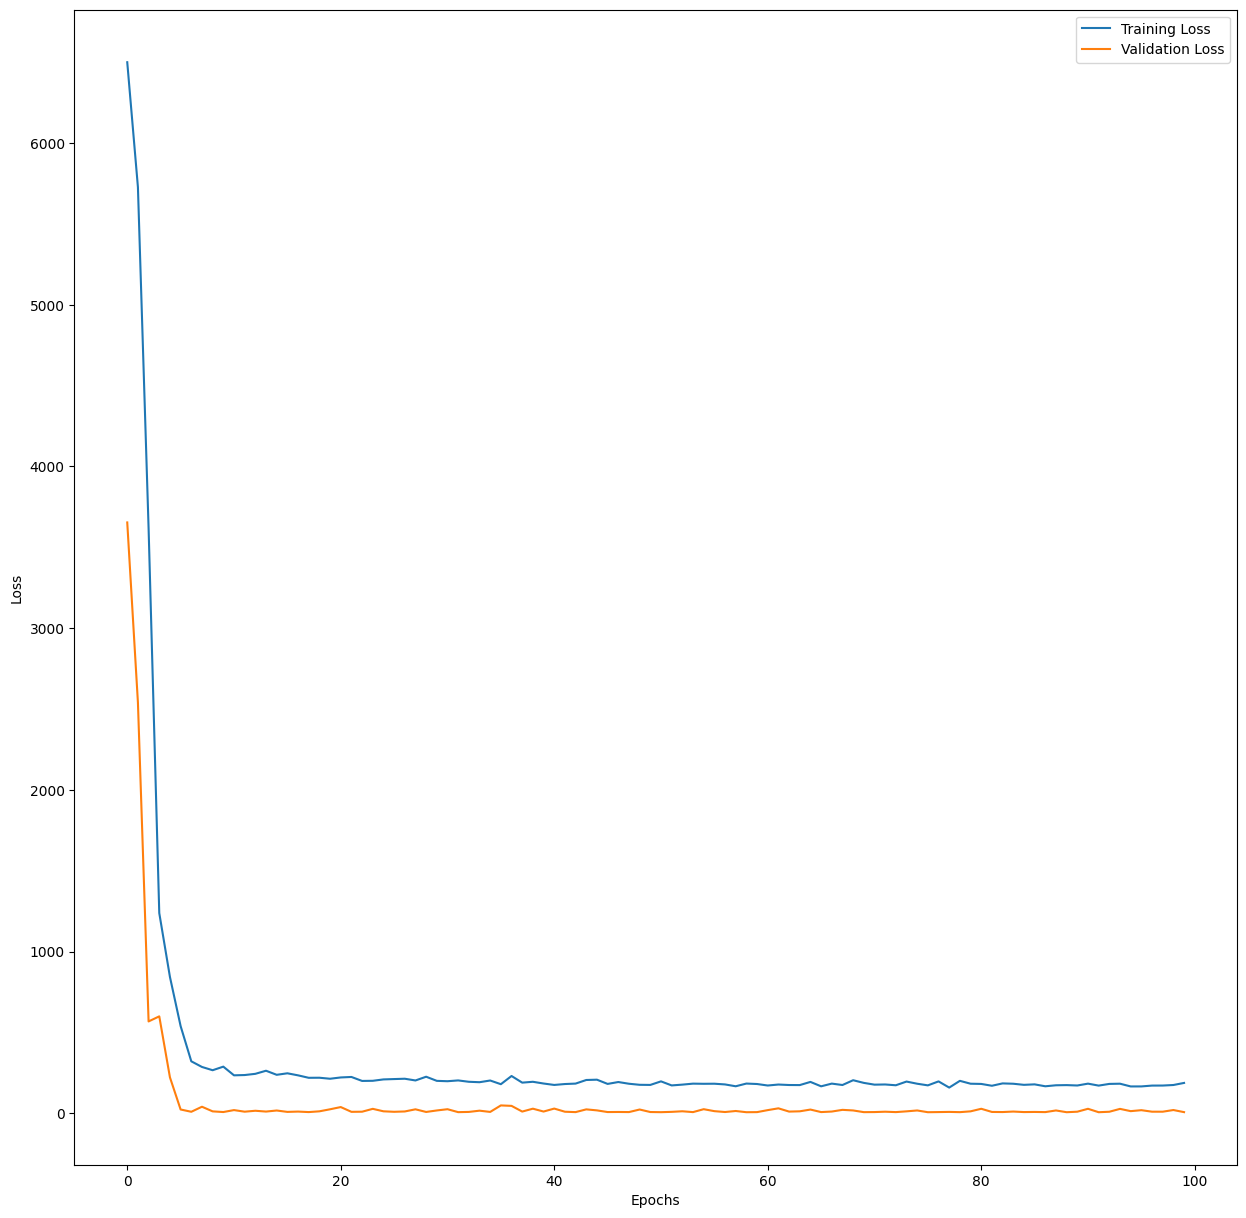

In [19]:
from sklearn.metrics import mean_absolute_error

plt.figure(figsize=(15, 15))
plt.plot(cıktı.history['loss'], label='Training Loss')
plt.plot(cıktı.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


24/24 [==============================] - 0s 2ms/step


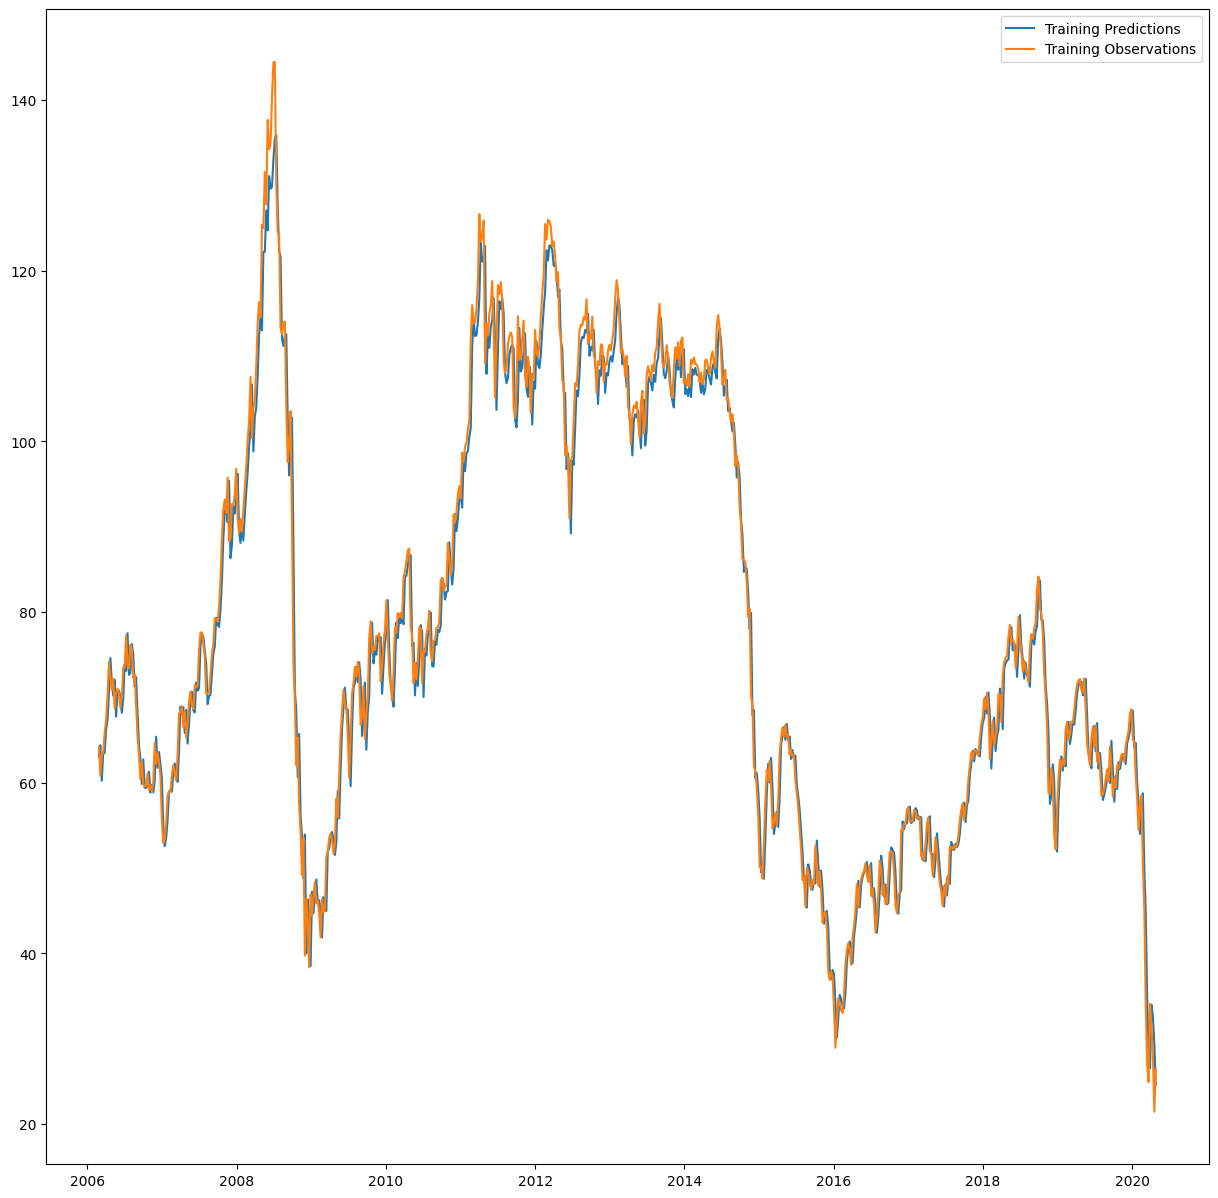

In [20]:
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(15, 15))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

3/3 [==============================] - 0s 6ms/step


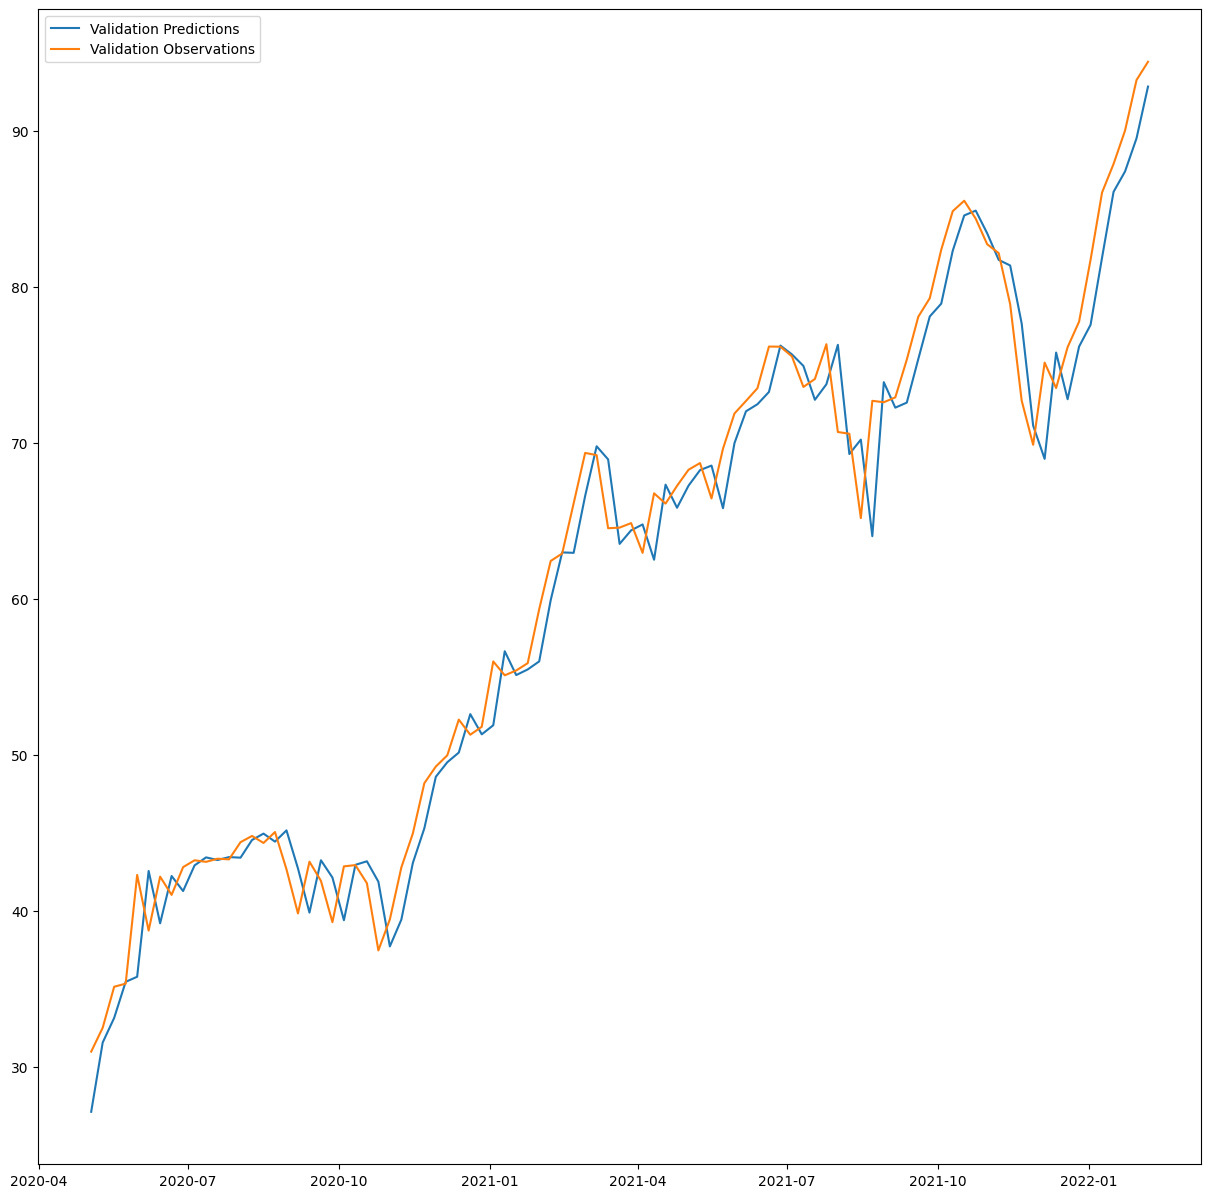

In [21]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(15, 15))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

3/3 [==============================] - 0s 4ms/step


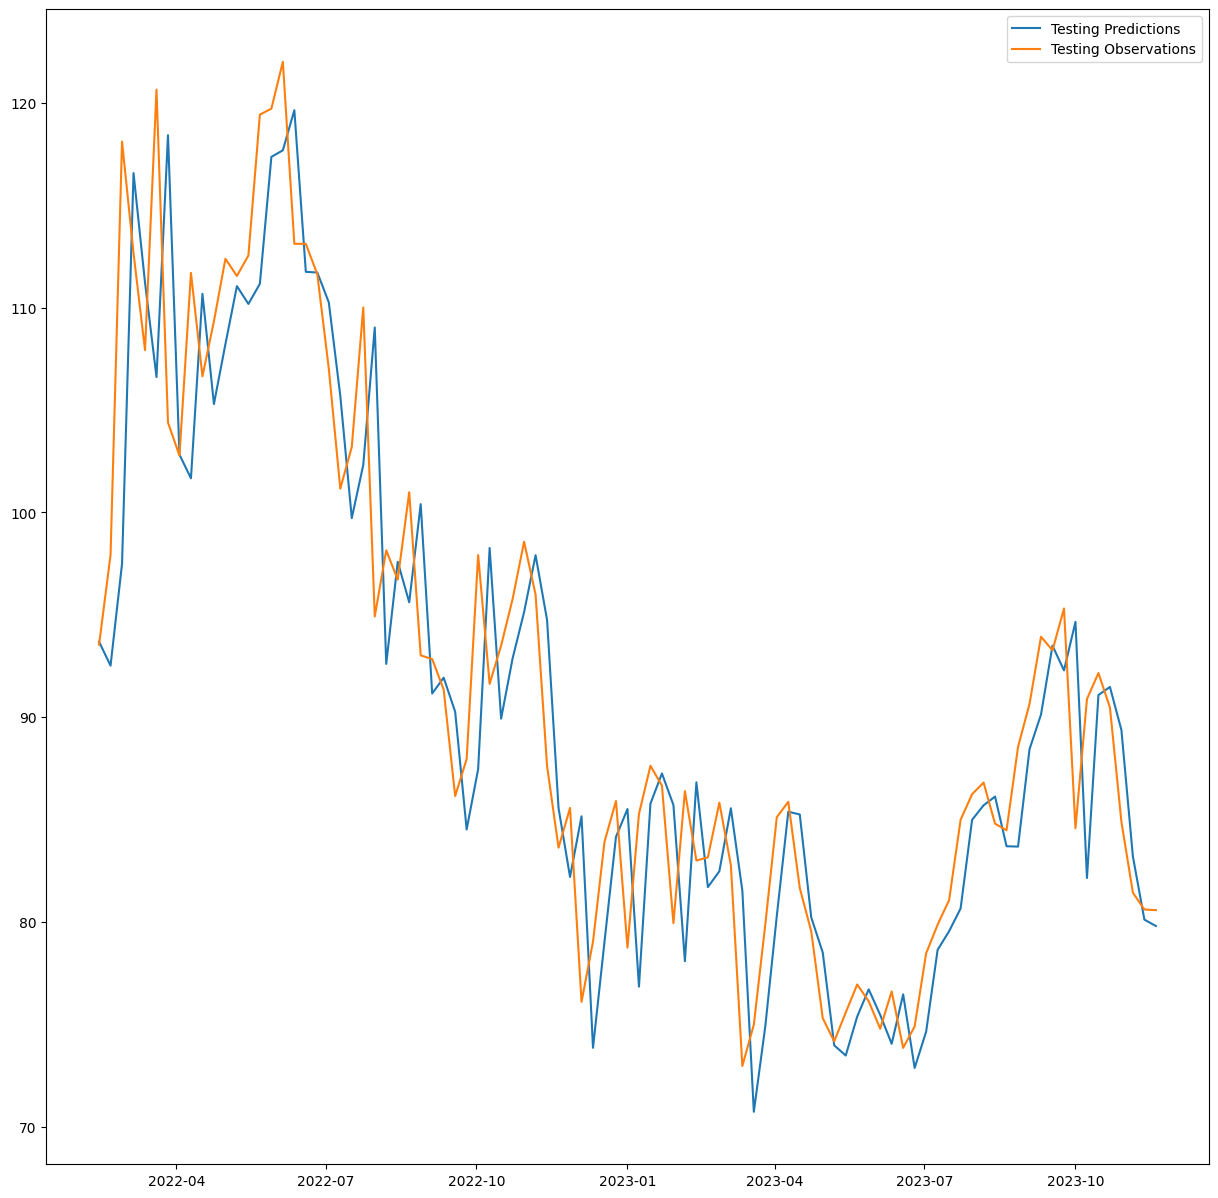

In [22]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(15, 15))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

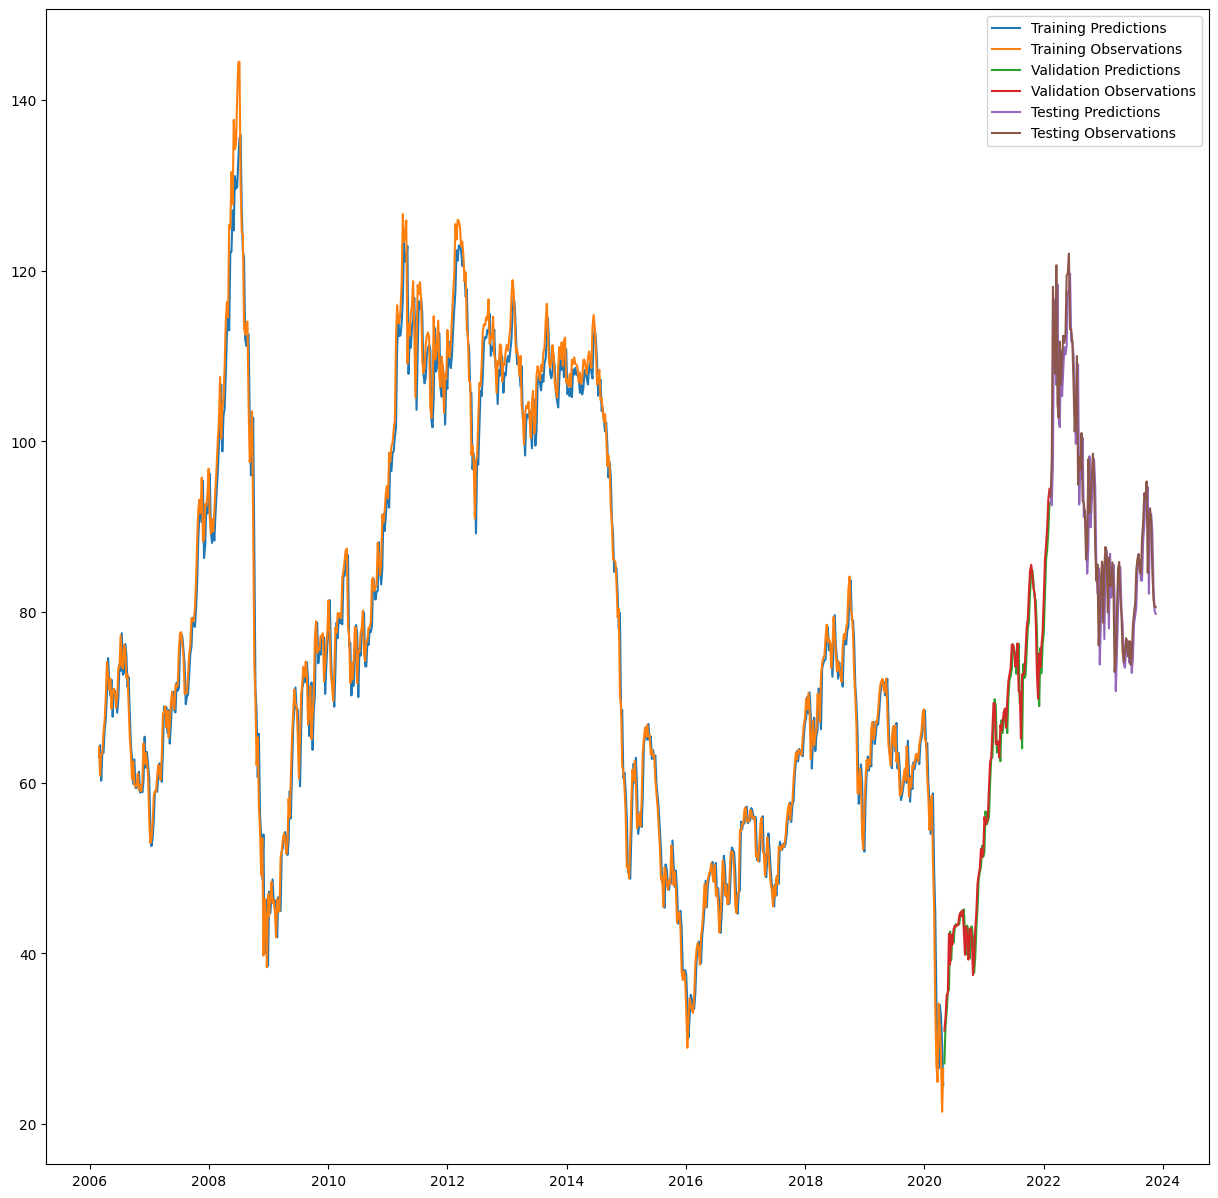

In [23]:
plt.figure(figsize=(15, 15))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

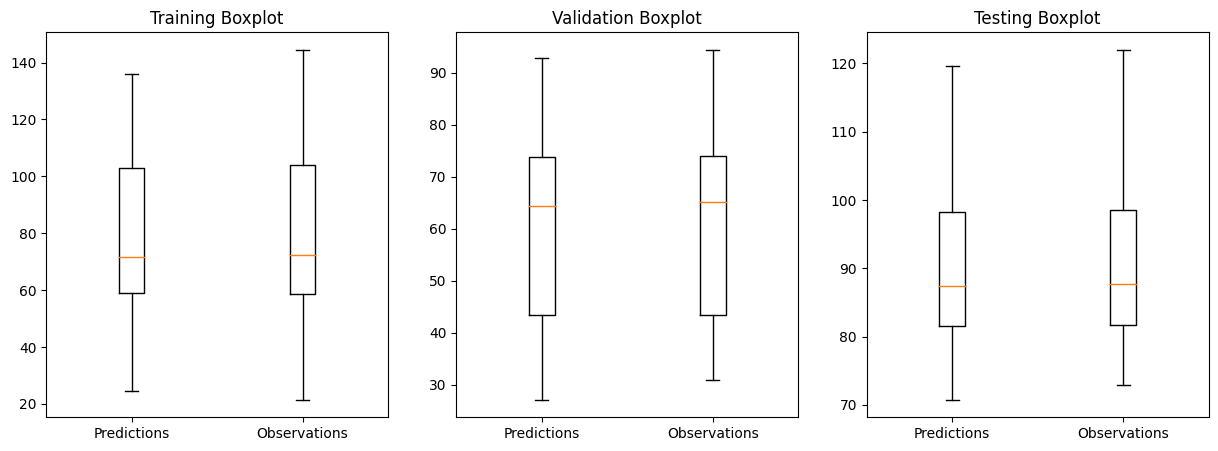

In [24]:
# Boxplot for Training
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot([train_predictions, y_train])
plt.title('Training Boxplot')
plt.xticks([1, 2], ['Predictions', 'Observations'])

# Boxplot for Validation
plt.subplot(1, 3, 2)
plt.boxplot([val_predictions, y_val])
plt.title('Validation Boxplot')
plt.xticks([1, 2], ['Predictions', 'Observations'])

# Boxplot for Testing
plt.subplot(1, 3, 3)
plt.boxplot([test_predictions, y_test])
plt.title('Testing Boxplot')
plt.xticks([1, 2], ['Predictions', 'Observations'])

plt.show()


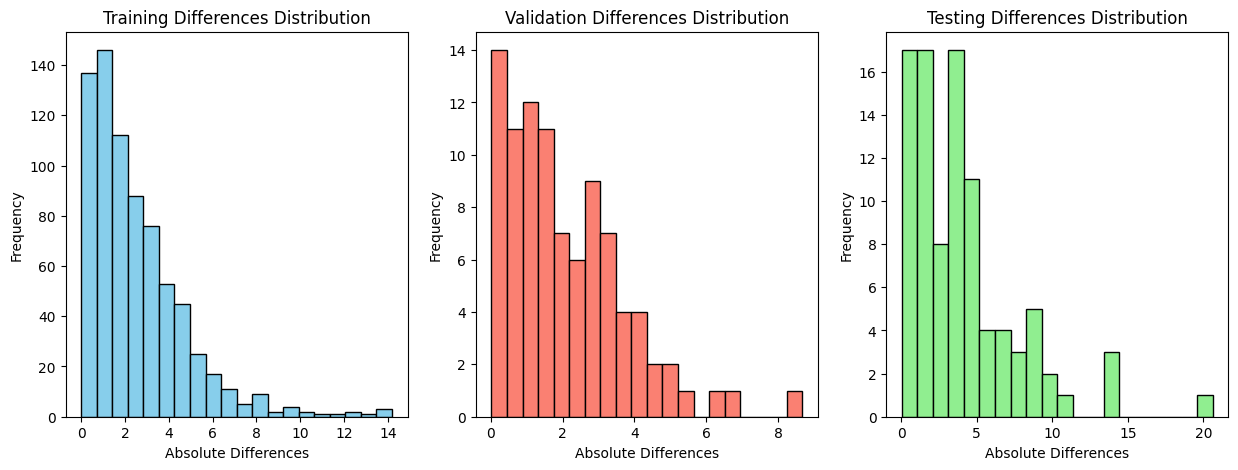

In [25]:
# Distribution plots for differences
plt.figure(figsize=(15, 5))

# Training
plt.subplot(1, 3, 1)
plt.hist(np.abs(train_predictions - y_train), bins=20, color='skyblue', edgecolor='black')
plt.title('Training Differences Distribution')
plt.xlabel('Absolute Differences')
plt.ylabel('Frequency')

# Validation
plt.subplot(1, 3, 2)
plt.hist(np.abs(val_predictions - y_val), bins=20, color='salmon', edgecolor='black')
plt.title('Validation Differences Distribution')
plt.xlabel('Absolute Differences')
plt.ylabel('Frequency')

# Testing
plt.subplot(1, 3, 3)
plt.hist(np.abs(test_predictions - y_test), bins=20, color='lightgreen', edgecolor='black')
plt.title('Testing Differences Distribution')
plt.xlabel('Absolute Differences')
plt.ylabel('Frequency')

plt.show()


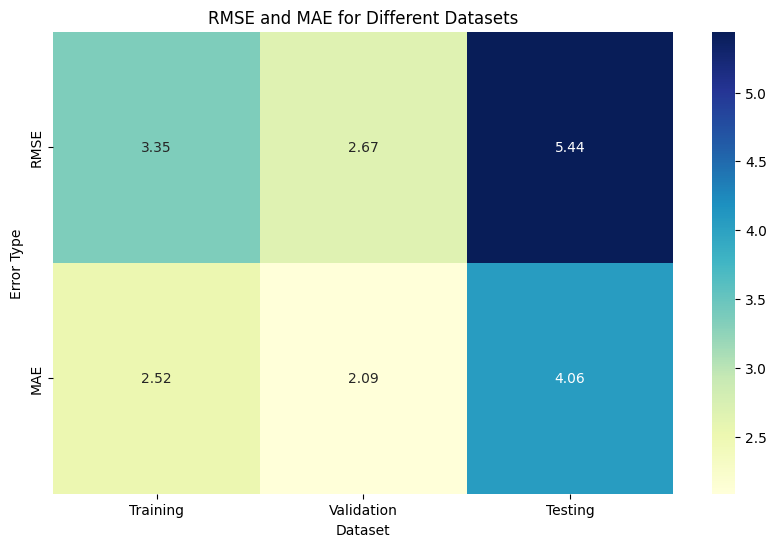

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

# Calculate RMSE and MAE for training set
rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
mae_train = mean_absolute_error(y_train, train_predictions)

# Calculate RMSE and MAE for validation set
rmse_val = np.sqrt(mean_squared_error(y_val, val_predictions))
mae_val = mean_absolute_error(y_val, val_predictions)

# Calculate RMSE and MAE for testing set
rmse_test = np.sqrt(mean_squared_error(y_test, test_predictions))
mae_test = mean_absolute_error(y_test, test_predictions)

# Create a heatmap for RMSE and MAE
data = np.array([[rmse_train, rmse_val, rmse_test],
                 [mae_train, mae_val, mae_test]])

labels = ['RMSE', 'MAE']
datasets = ['Training', 'Validation', 'Testing']

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=datasets, yticklabels=labels, ax=ax)
ax.set_title('RMSE and MAE for Different Datasets')
ax.set_xlabel('Dataset')
ax.set_ylabel('Error Type')

plt.show()


In [27]:
from copy import deepcopy

recursive_predictions = []
recursive_dates=np.concatenate([dates_val, dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction=model.predict(np.array([last_window[-3:]])).flatten()
    recursive_predictions.append(next_prediction)
    last_window=np.concatenate((last_window,[next_prediction]))




1/1 [==============================] - 0s 19ms/step


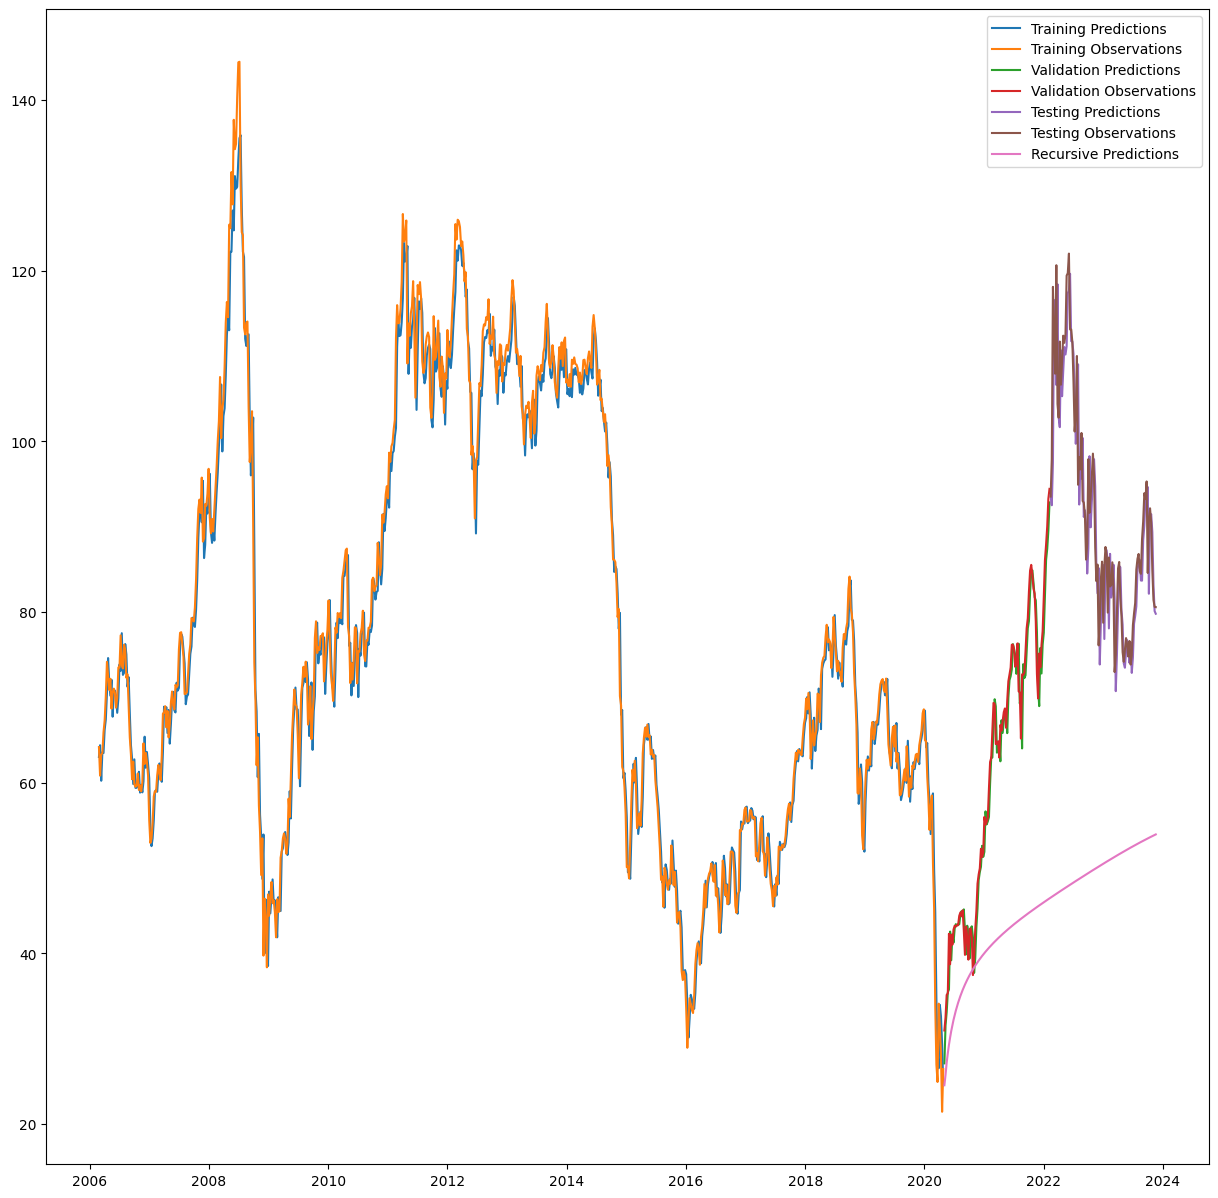

In [28]:

plt.figure(figsize=(15, 15))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])